## Portfolio assignment 18
30 min: Train a decision tree to predict one of the numerical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the RMSE for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?
    
![](https://i.imgur.com/0v1CGNV.png)

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import graphviz
type_dict = {'Team': 'object', 'Season': 'object', 'KEY': 'object', 'Player': 'object', 'Position': 'object', 'Appearances': 'float64', 'Goals': 'float64', 'Started': 'float64', 'Started As A Sub': 'float64', 'Came On': 'float64', 'Taken Off': 'float64', 'Own Goals': 'float64', 'Type Of Goal': 'object', 'First Half': 'float64', 'Second Half': 'float64', 'First Scorer': 'object', 'Last Scorer': 'object', 'Home': 'float64', 'Away': 'float64', 'Right Foot': 'float64', 'Left Foot': 'float64', 'Header': 'float64', 'Other Method': 'float64', 'Open Play': 'float64', 'Cross': 'float64', 'Free Kick': 'float64', 'Direct Free Kick': 'float64', 'Throw In': 'float64', 'Penalty': 'float64', 'Corner': 'float64', 'Other Type Of Play': 'float64', 'Minutes played': 'float64', 'Min/goal': 'float64', 'Assists': 'float64', '% Assists': 'float64', 'Leading Recipient': 'object', 'Recipient Goals': 'float64', 'CS': 'float64', '% Clean Sheets': 'float64', 'Hat Tricks': 'float64', 'Yellow Cards': 'float64', 'Yellow - First Half': 'float64', 'Yellow - Second Half': 'float64', 'Yellow - Home': 'float64', 'Yellow - Away': 'float64', 'Yelow - Minutes Played': 'float64', 'Minutes per Yellow Cards': 'float64', 'Sent Off': 'float64', 'Straight Red Card': 'float64', 'Two Yellow Cards': 'float64', 'Red - First Half': 'float64', 'Red - Second Half': 'float64', 'Red - Home': 'float64', 'Red - Away': 'float64', 'Red - Minutes Played': 'float64', 'Minutes per Red Cards': 'float64'}
playerStatsAllLeagues = pd.read_csv('merged-csv-files.csv', sep=',', dtype=type_dict)
playerStatsAllLeaguesNoTeams = playerStatsAllLeagues[(playerStatsAllLeagues['Position'] != 'Other') & (~playerStatsAllLeagues['Position'].isna())]
def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

playerStatsAllLeaguesNoTeams

,League,Team,Season,KEY,Player,Position,Appearances,Goals,Started,Started As A Sub,...,Minutes per Yellow Cards,Sent Off,Straight Red Card,Two Yellow Cards,Red First Half,Red Second Half,Red Home,Red Away,Red Minutes Played,Minutes per Red Cards
1,Premier League,Chelsea,2014/15,Premier League|Chelsea|2014/15,Eden Hazard,Midfielder,38.0,14.0,38.0,0.0,...,1689.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Premier League,Chelsea,2014/15,Premier League|Chelsea|2014/15,John Terry,Defender,38.0,5.0,38.0,0.0,...,1710.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Premier League,Chelsea,2014/15,Premier League|Chelsea|2014/15,Branislav Ivanovic,Defender,38.0,4.0,38.0,0.0,...,310.91,1.0,NaN,1.0,NaN,1.0,NaN,1.0,3420.0,3420.0
4,Premier League,Chelsea,2014/15,Premier League|Chelsea|2014/15,Nemanja Matic,Midfielder,36.0,1.0,35.0,1.0,...,312.40,1.0,1.0,NaN,NaN,1.0,1.0,NaN,3164.0,3164.0
5,Premier League,Chelsea,2014/15,Premier League|Chelsea|2014/15,Gary Cahill,Defender,36.0,1.0,33.0,5.0,...,596.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27915,Scottish Premiership,Inverness Cali,2016/17,Scottish Premiership|Inverness Cali|2016/17,Jason Brown,Midfielder,0.0,0.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27916,Scottish Premiership,Inverness Cali,2016/17,Scottish Premiership|Inverness Cali|2016/17,Daniel Hoban,Goalkeeper,0.0,0.0,0.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27917,Scottish Premiership,Inverness Cali,2016/17,Scottish Premiership|Inverness Cali|2016/17,Sam Robertson,Defender,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27918,Scottish Premiership,Inverness Cali,2016/17,Scottish Premiership|Inverness Cali|2016/17,Andrew MacRae,Forward,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Split the dataset into a train (70%) and test (30%) set.

In [73]:
playerStatsAllLeaguesNoTeams_train, playerStatsAllLeaguesNoTeams_test = train_test_split(playerStatsAllLeaguesNoTeams, test_size=0.3, random_state=42, stratify=playerStatsAllLeaguesNoTeams['Position'])
print(playerStatsAllLeaguesNoTeams_train.shape, playerStatsAllLeaguesNoTeams_test.shape)

(18645, 57) (7992, 57)


Fit DecisionTreeRegressor

In [74]:
features= ['Goals']
dt_regression = DecisionTreeRegressor(max_depth = 1)
dt_regression.fit(playerStatsAllLeaguesNoTeams_train[features], playerStatsAllLeaguesNoTeams_train['Appearances'])

DecisionTreeRegressor(max_depth=1)

Plot regressor

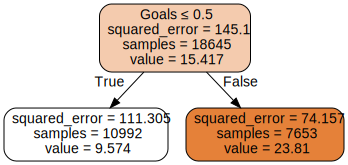

In [75]:
plot_tree_regression(dt_regression, features)

Evaluate

In [76]:
predictionsOnTrainset = dt_regression.predict(playerStatsAllLeaguesNoTeams_train[features])
predictionsOnTestset = dt_regression.predict(playerStatsAllLeaguesNoTeams_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, playerStatsAllLeaguesNoTeams_train['Appearances'])
rmseTest = calculate_rmse(predictionsOnTestset, playerStatsAllLeaguesNoTeams_test['Appearances'])

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 9.800894449476562
RMSE on test set 9.80879001736665


Yes there is a difference between the test and train set. The accuracy of the train set is not supposed to be better than the accuracy of the test set, beacuse then there would be overfitting. The goal of the max_depth is to be at the minimum amount of max_depth where the test set accuracy is higher then the train set, in this case that's when the value of max_depth is 1.  